In [1]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from PIL import Image

In [2]:
def fix_layout(width:int=95):
    from IPython.core.display import display, HTML
    display(HTML('<style>.container { width:' + str(width) + '% !important; }</style>'))

fix_layout()

### Create Background

In [100]:
path_img= f"background_1.tiff"
if os.path.isfile(path_img):
    backgnd = cv.imread(path_img, 0)
else:
    print ("The file " + path_img + " does not exist.")

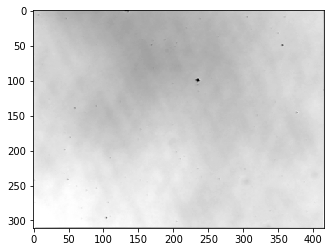

In [101]:
plt.imshow(backgnd, cmap='gray')

In [356]:
backgnd.shape

(311, 416)

In [83]:
grid = 10
height = backgnd.shape[0]*grid
width = backgnd.shape[1]*grid

In [112]:
img = np.zeros([height,width],dtype=np.uint8)
img.fill(122)

In [424]:
height_subbckgnd = backgnd.shape[0]
width_subbackgnd = backgnd.shape[1]

for i in range(grid):
    for j in range(grid):
        img[j*height_subbckgnd:(j+1)*height_subbckgnd,i*width_subbackgnd:(i+1)*width_subbackgnd] = backgnd

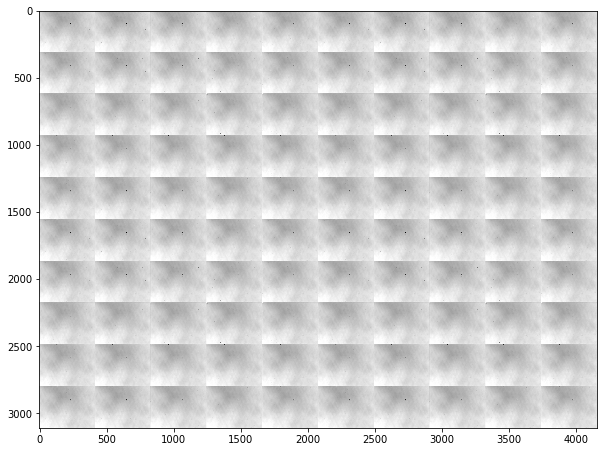

In [425]:
plt.figure(figsize=(10, 8))

plt.imshow(img, cmap='gray')

In [87]:
cv.imwrite("background1.tiff", img)

True

In [97]:
path_img= f"data1_cropped/extract/1.tiff"
if os.path.isfile(path_img):
    section = cv.imread(path_img,0)
else:
    print ("The file " + path_img + " does not exist.")

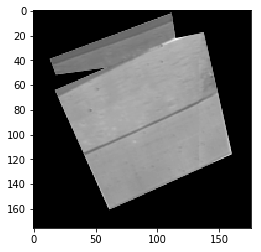

In [218]:
plt.imshow(section, cmap='gray')

In [106]:
section.shape

(176, 176)

In [115]:
img2 = img

In [116]:
img2[2000:2000+176,2000:2000+176] = section

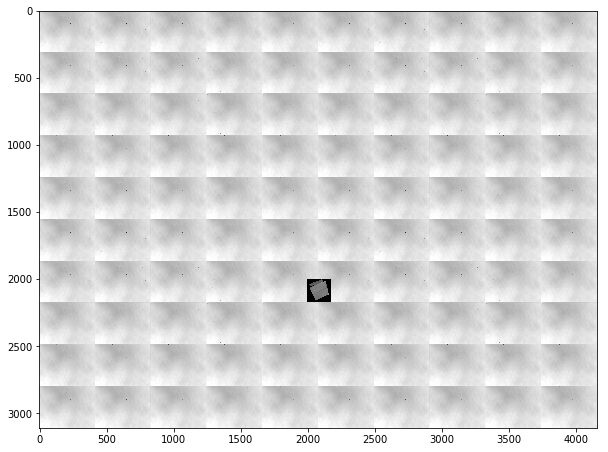

In [117]:
plt.figure(figsize=(10, 8))

plt.imshow(img, cmap='gray')

In [159]:
img_test = np.zeros([height,width],dtype=np.uint8)
img_test.fill(255)

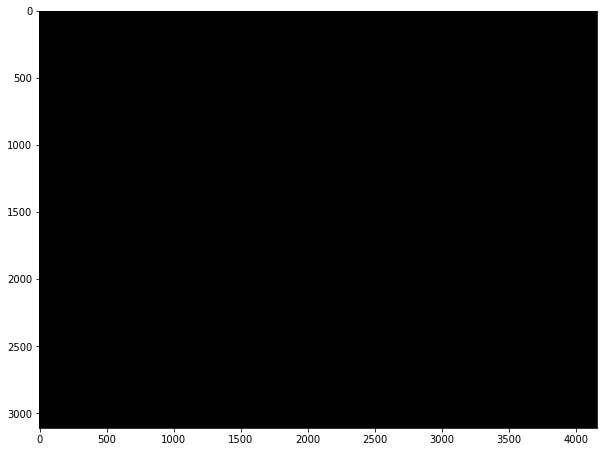

In [147]:
plt.figure(figsize=(10, 8))

plt.imshow(img_test, cmap='gray')

In [259]:
ind_true = section > 5

In [417]:
sub = img_test[2000:2000+176,2000:2000+176]

In [418]:
for i in range(176):
    for j in range(176):
        if(ind_true[i,j]):
            sub[i,j] = section[i,j]
        else:
            sub[i,j] = 255

In [419]:
for i in range(176):
    for j in range(176):
        if(sub[i,j] < 40):
            sub[i,j] = 255

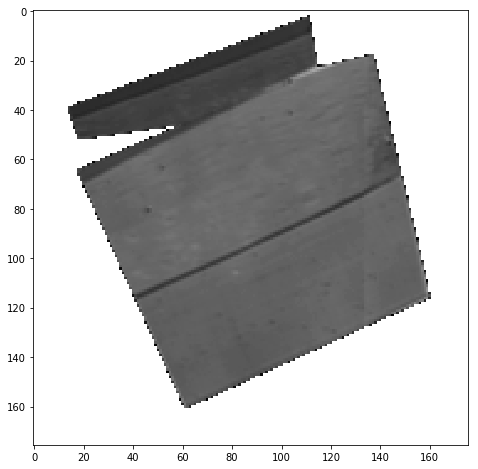

In [420]:
plt.figure(figsize=(10, 8))

plt.imshow(sub, cmap='gray')

In [264]:
cv.imwrite("test.tiff", sub)

True

In [416]:
img_test = np.zeros([height,width],dtype=np.uint8)
img_test.fill(255)

In [345]:
img_test[2000:2000+176,2000:2000+176] = sub

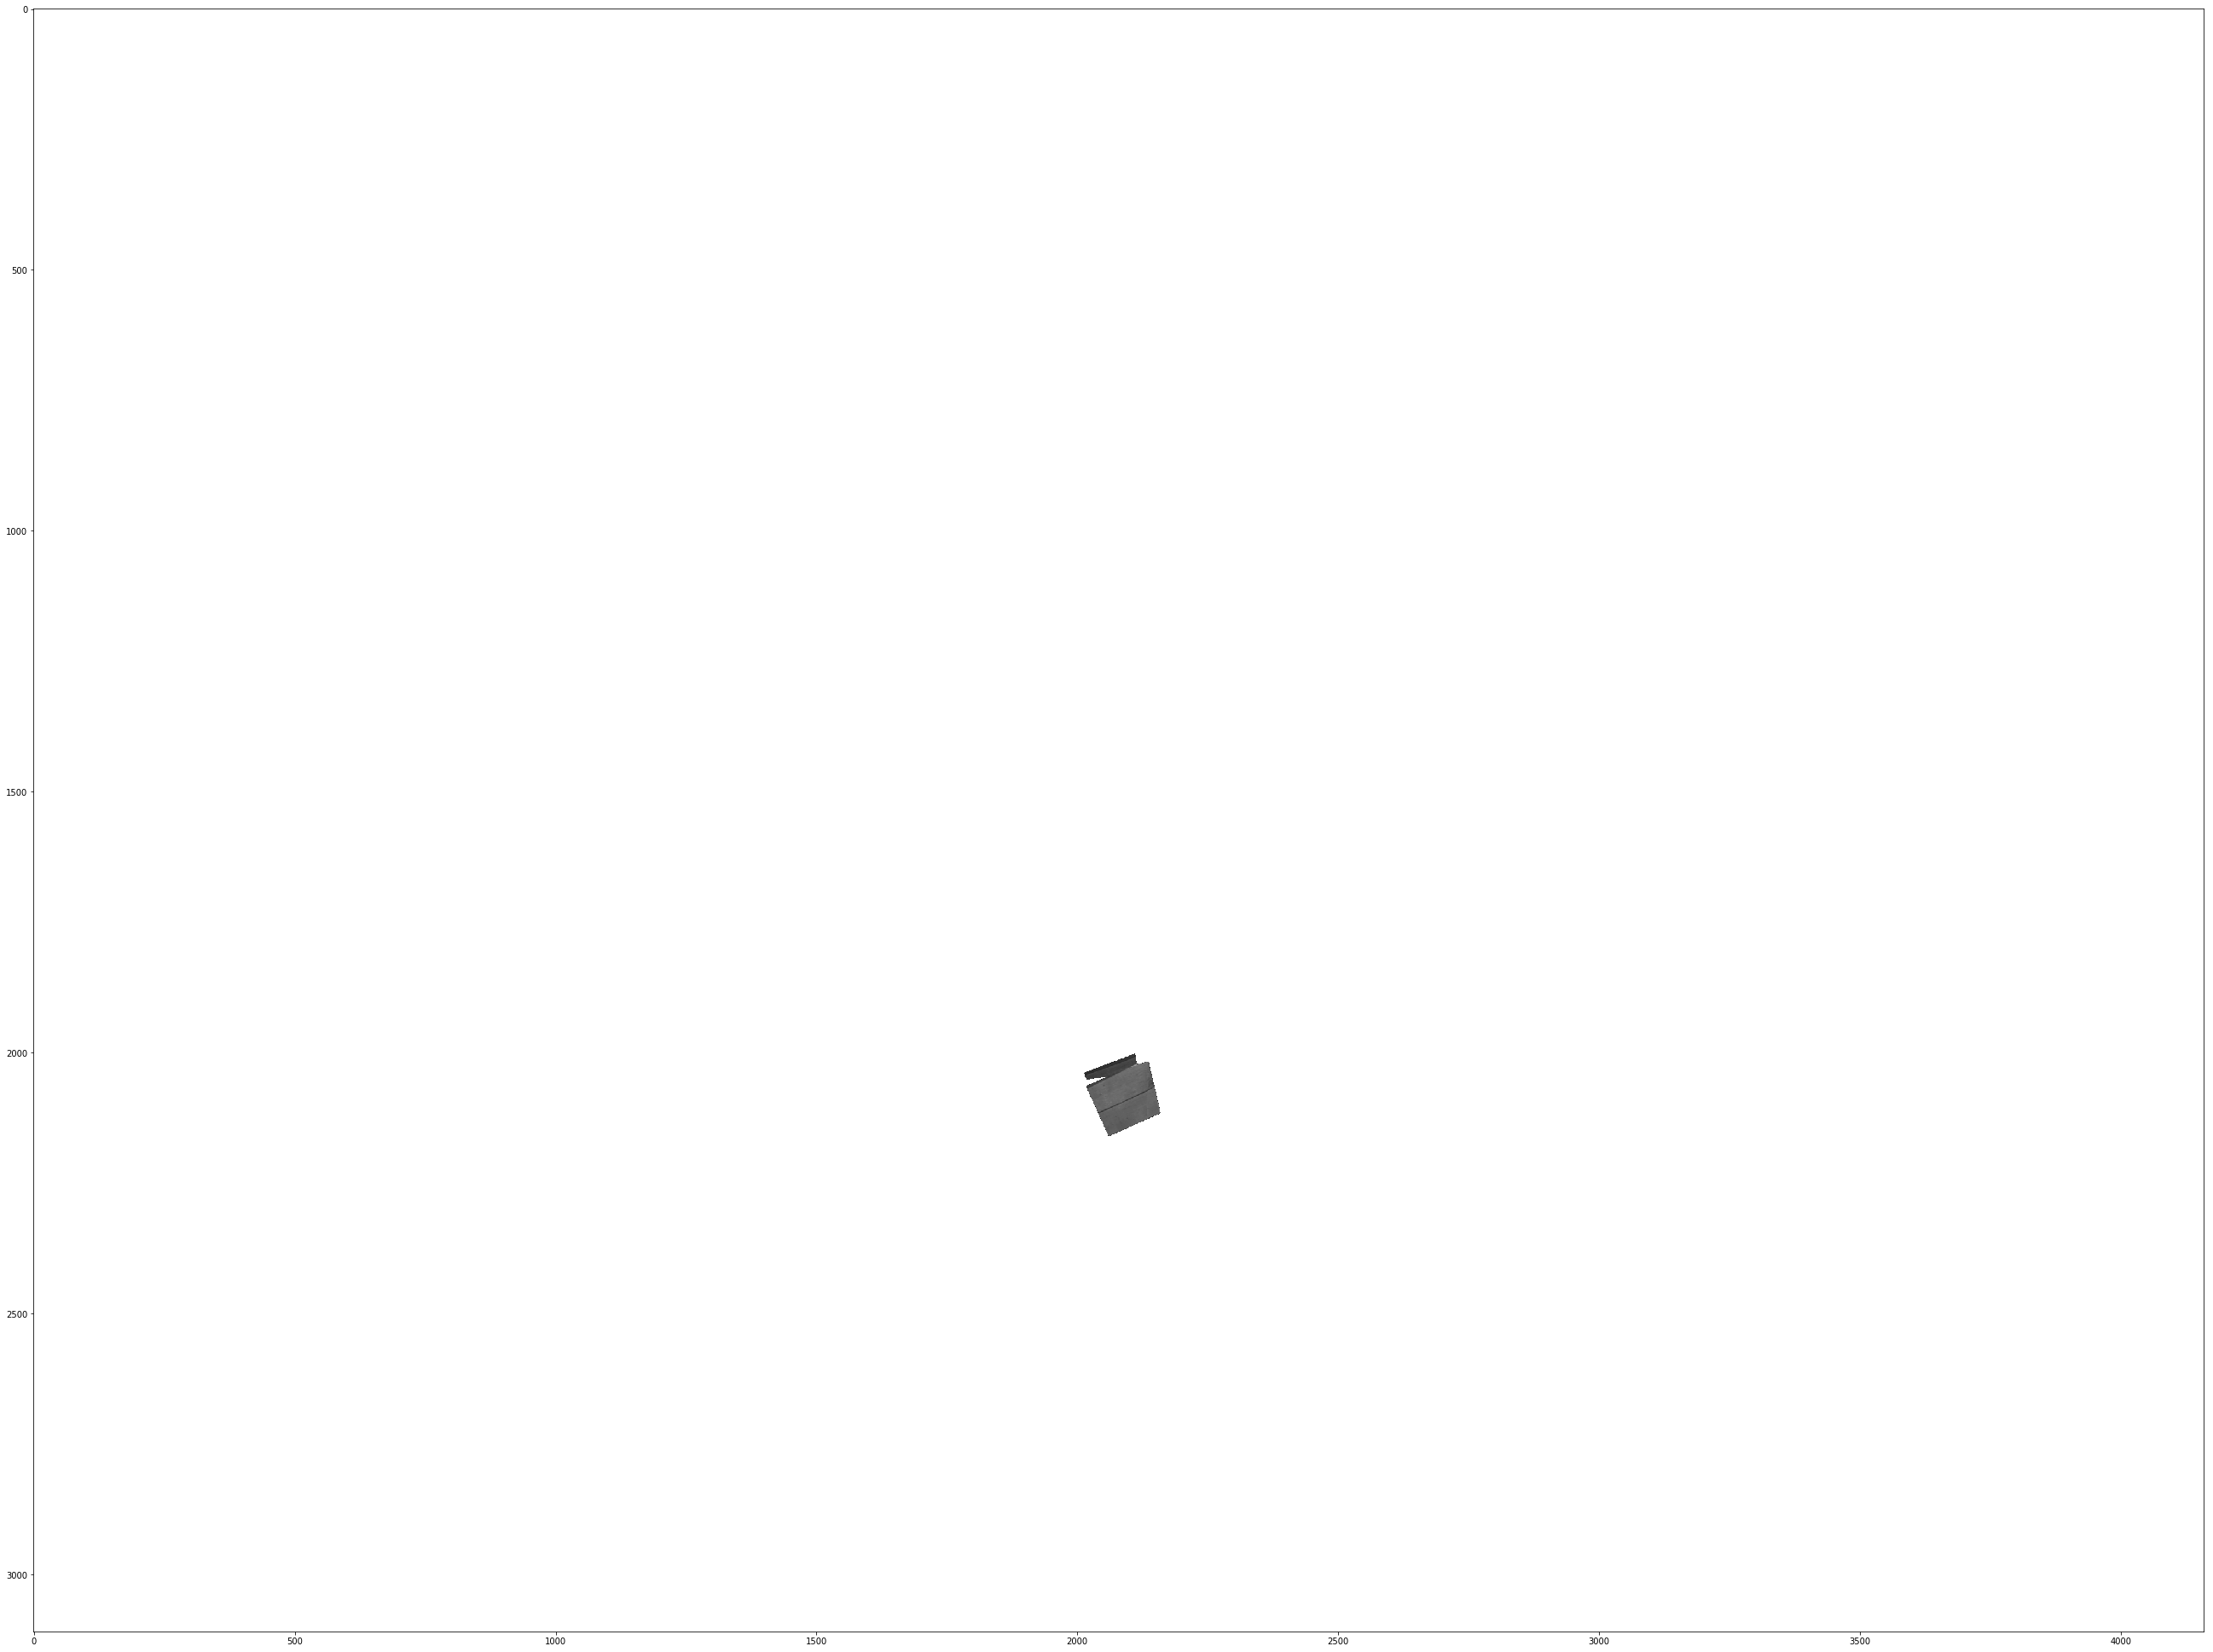

In [421]:
plt.figure(figsize=(50, 35))

plt.imshow(img_test, cmap='gray')

In [270]:
index = pd.MultiIndex.from_tuples([('point_1', 'x'), ('point_1', 'y'), ('point_2', 'x'), ('point_2', 'y'),
                                   ('point_3', 'x'), ('point_3', 'y'), ('point_4', 'x'), ('point_4', 'y')])

In [271]:
boxes_tissues = pd.read_csv(f"boxes_tissues_1.txt", sep="\t|,", header=None, names=index, engine='python')
#Without scale
boxes_tissues.head()

point_1      point_2     point_3     point_4    
        x    y       x   y       x   y       x   y
0      36  110      16  58     142  16     148  67
1      40  114      16  64     141  16     150  65
2      38  110      16  59     143  16     149  66
3      45  126      16  78     132  16     147  66
4      44  123      16  75     136  16     148  65

In [272]:
boxes_mag = pd.read_csv(f"boxes_mag_1.txt", sep="\t|,", header=None, names=index, engine='python')
#Without scale
boxes_mag.head()

point_1      point_2      point_3     point_4     
        x    y       x    y       x   y       x    y
0      55  156      37  112     148  68     156  118
1      61  160      42  117     149  67     160  114
2      58  156      39  111     150  67     158  115
3      71  171      46  128     146  66     163  113
4      68  166      44  124     148  66     162  113

In [274]:
def rgb(hex_color):
    return tuple(int(hex_color.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))

In [309]:
def draw_labels_custom(image, labels_df, thickness, color, fill_poly):
    pts = np.array(labels_df).reshape((-1,1,2))
    if fill_poly:
        image = cv.fillPoly(image, np.int32([pts]), color=rgb(color))
    else:
        image = cv.polylines(image, np.int32([pts]), True, color=rgb(color), thickness=thickness)

    return image

In [312]:
thickness = 5
magnet_color = "#00cccc"
tissue_color = "#ff6666"

fill_poly = False

In [ ]:
img_test = np.zeros([height,width],dtype=np.uint8)
img_test.fill(255)

In [413]:
if(np.mean(img_test[0:310,416]) == 255):
    print("yes")
else:
    print("no")

yes


In [422]:
width_subbckgnd = backgnd.shape[1]
height_subbckgnd = backgnd.shape[0]

for ind_y in range(10):
    for ind_x in range(10):
        if(np.mean(img_test[backgnd.shape[0]*ind_y:backgnd.shape[0]*(ind_y+1),backgnd.shape[1]*ind_x:backgnd.shape[1]*(ind_x+1)]) == 255):
            img_test[backgnd.shape[0]*ind_y:backgnd.shape[0]*(ind_y+1),backgnd.shape[1]*ind_x:backgnd.shape[1]*(ind_x+1)] =   backgnd
        else:
            for i in range(backgnd.shape[0]):
                for j in range(backgnd.shape[1]):
                    if(img_test[height_subbckgnd*ind_y + i , width_subbckgnd*ind_x + j] == 255):
                        img_test[height_subbckgnd*ind_y + i, width_subbckgnd*ind_x + j] = backgnd[i,j]
        

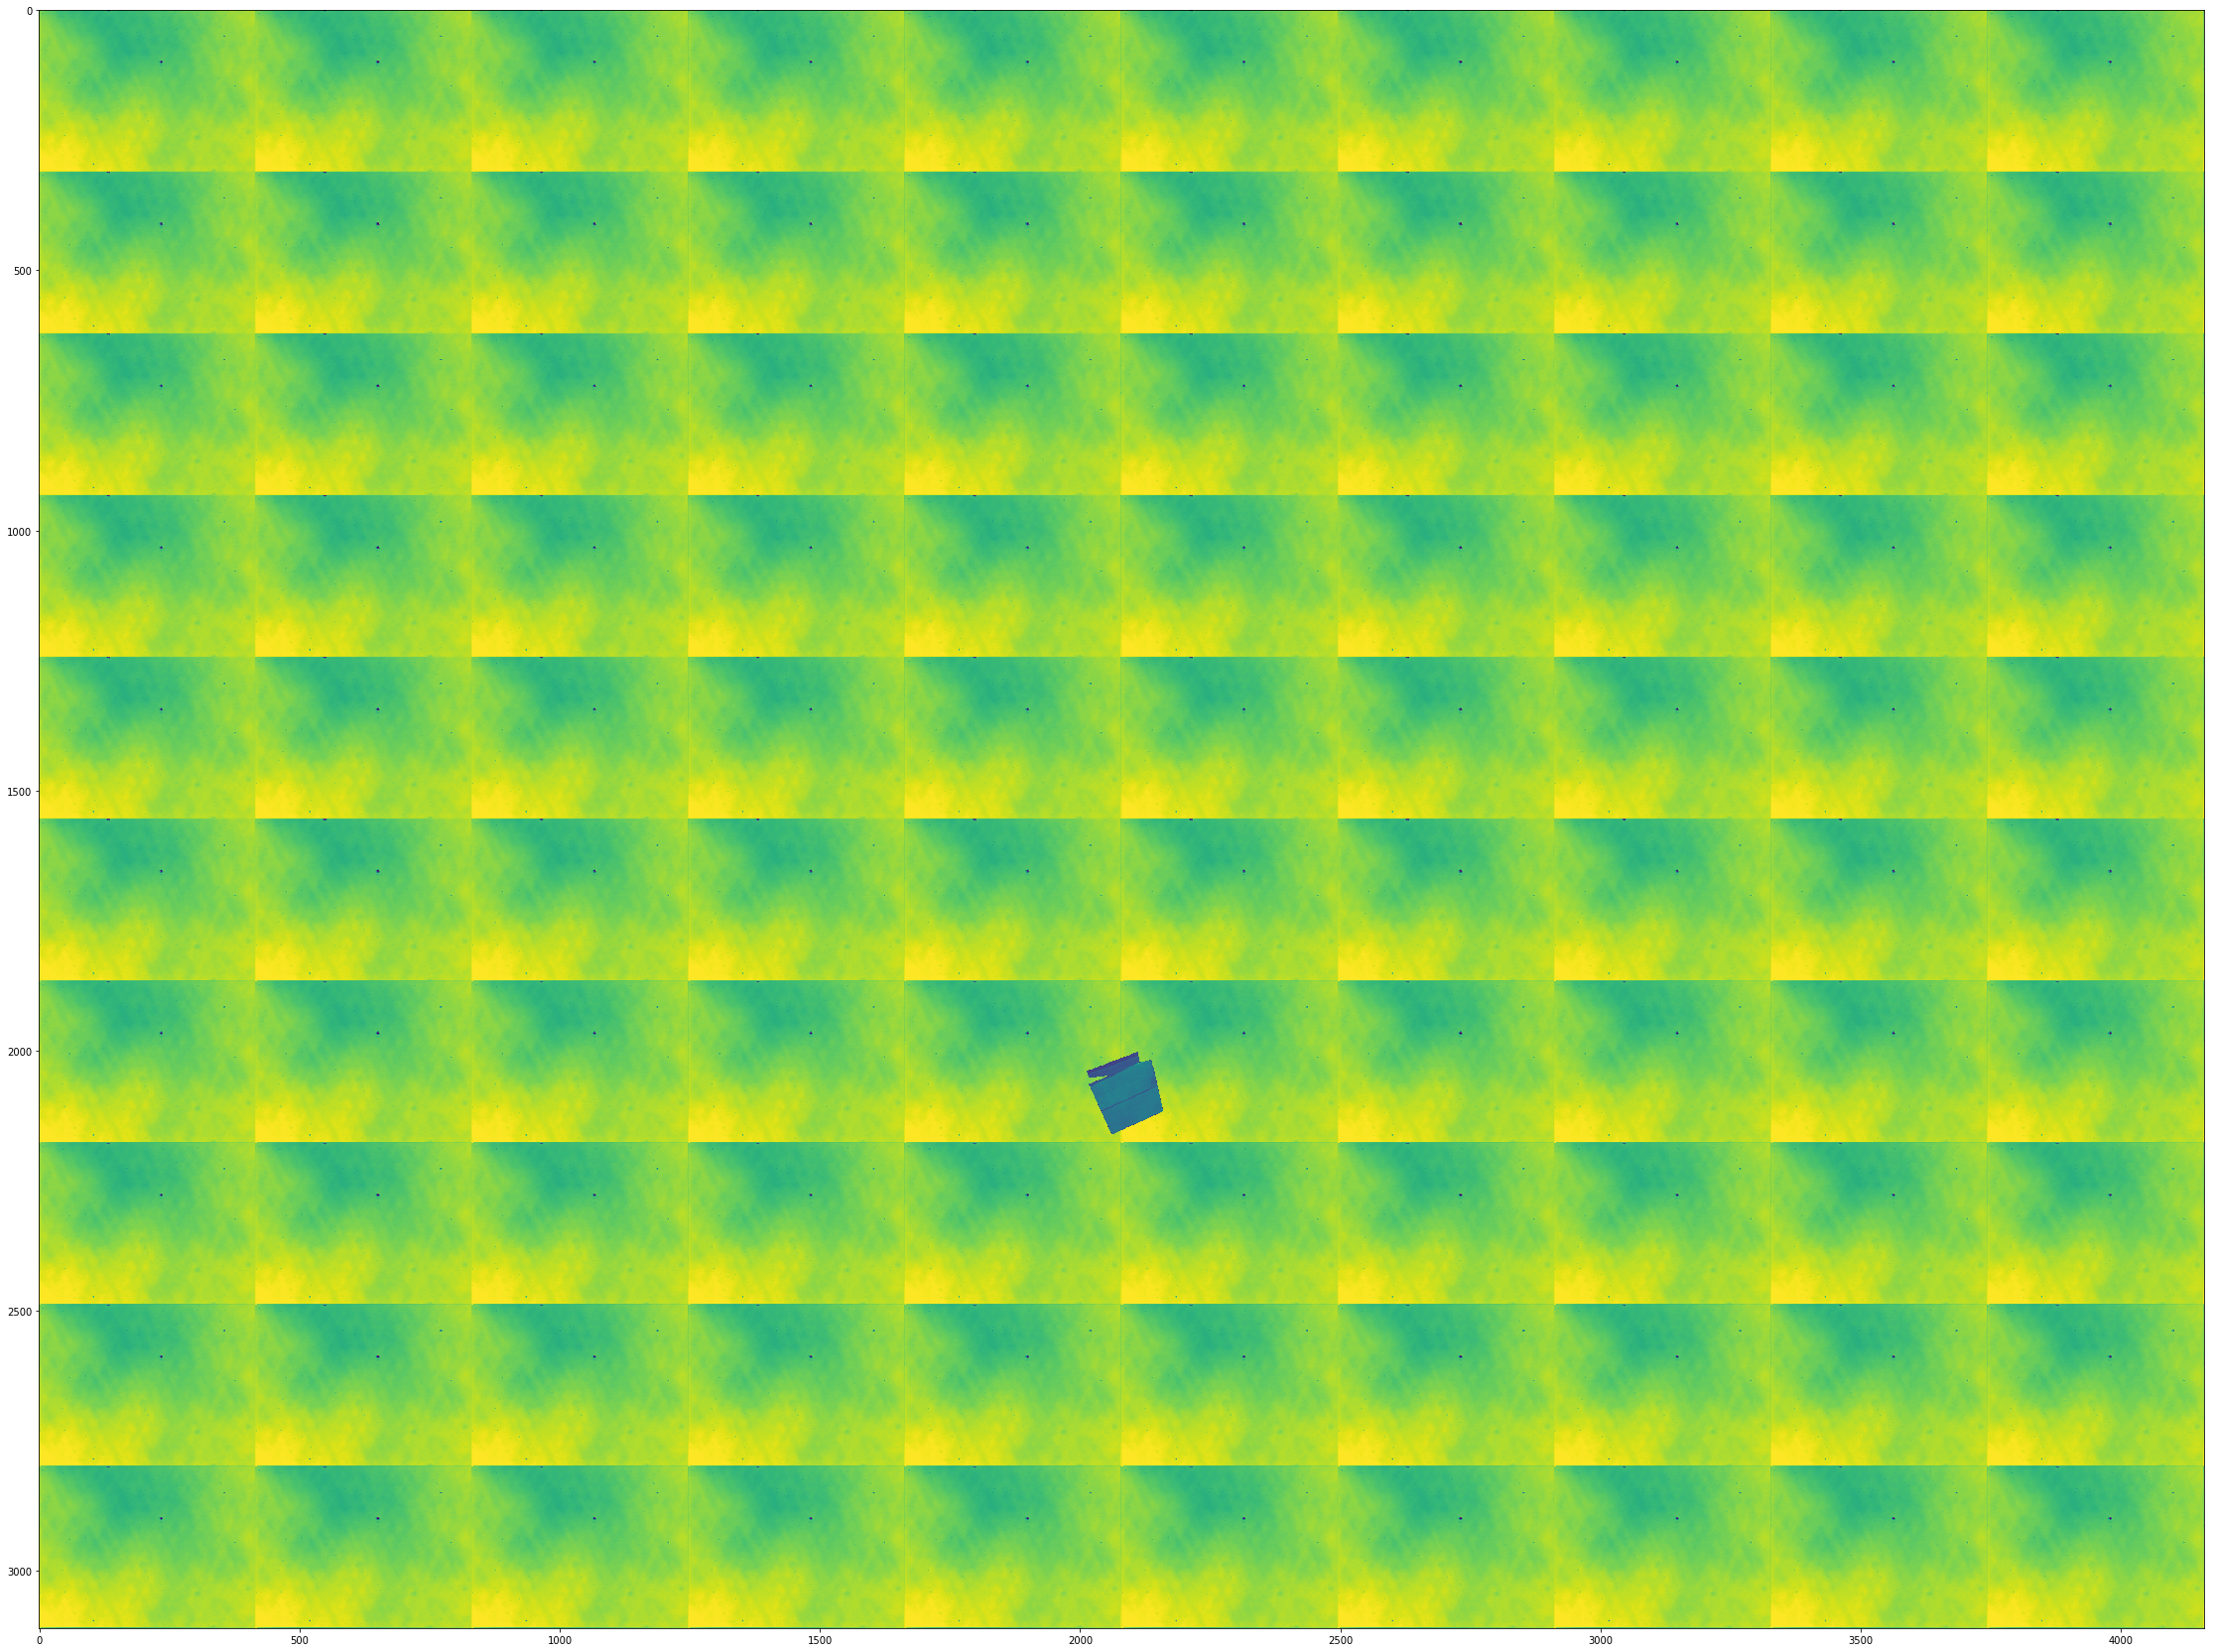

In [423]:
plt.figure(figsize=(40, 30))
plt.imshow(img_test)

In [375]:
cv.imwrite("test2_wthbackground.tiff", img_test)

True

In [ ]:
xmin_subimage = 2000
ymin_subimage = 2000

In [393]:
temp_tissue = boxes_tissues.iloc[1]
artific_seg_tissues = pd.DataFrame(columns= ['x1','y1', 'x2','y2', 'x3','y3', 'x4','y4'])

In [394]:
artific_seg_tissues.at[0,'x1'] = temp_tissue['point_1']['x'] + xmin_subimage
artific_seg_tissues.at[0,'y1'] = temp_tissue['point_1']['y'] + ymin_subimage

artific_seg_tissues.at[0,'x2'] = temp_tissue['point_2']['x'] + xmin_subimage
artific_seg_tissues.at[0,'y2'] = temp_tissue['point_2']['y'] + ymin_subimage

artific_seg_tissues.at[0,'x3'] = temp_tissue['point_3']['x'] + xmin_subimage
artific_seg_tissues.at[0,'y3'] = temp_tissue['point_3']['y'] + ymin_subimage

artific_seg_tissues.at[0,'x4'] = temp_tissue['point_4']['x'] + xmin_subimage
artific_seg_tissues.at[0,'y4'] = temp_tissue['point_4']['y'] + ymin_subimage

In [395]:
artific_seg_tissues

,x1,y1,x2,y2,x3,y3,x4,y4
0,2040,2114,2016,2064,2141,2016,2150,2065


In [396]:
temp_mag = boxes_mag.iloc[1]
artific_seg_mag = pd.DataFrame(columns= ['x1','y1', 'x2','y2', 'x3','y3', 'x4','y4'])

In [397]:
artific_seg_mag.at[0,'x1'] = temp_mag['point_1']['x'] + xmin_subimage
artific_seg_mag.at[0,'y1'] = temp_mag['point_1']['y'] + ymin_subimage

artific_seg_mag.at[0,'x2'] = temp_mag['point_2']['x'] + xmin_subimage
artific_seg_mag.at[0,'y2'] = temp_mag['point_2']['y'] + ymin_subimage

artific_seg_mag.at[0,'x3'] = temp_mag['point_3']['x'] + xmin_subimage
artific_seg_mag.at[0,'y3'] = temp_mag['point_3']['y'] + ymin_subimage

artific_seg_mag.at[0,'x4'] = temp_mag['point_4']['x'] + xmin_subimage
artific_seg_mag.at[0,'y4'] = temp_mag['point_4']['y'] + ymin_subimage

In [398]:
artific_seg_mag

,x1,y1,x2,y2,x3,y3,x4,y4
0,2061,2160,2042,2117,2149,2067,2160,2114


In [399]:
path_img= f"test2_wthbackground.tiff"
if os.path.isfile(path_img):
    test_artificial = cv.imread(path_img)
else:
    print ("The file " + path_img + " does not exist.")

In [400]:
test_artificial = draw_labels_custom(test_artificial, artific_seg_mag, 2, magnet_color, False)
test_artificial = draw_labels_custom(test_artificial, artific_seg_tissues, 2, tissue_color, False)

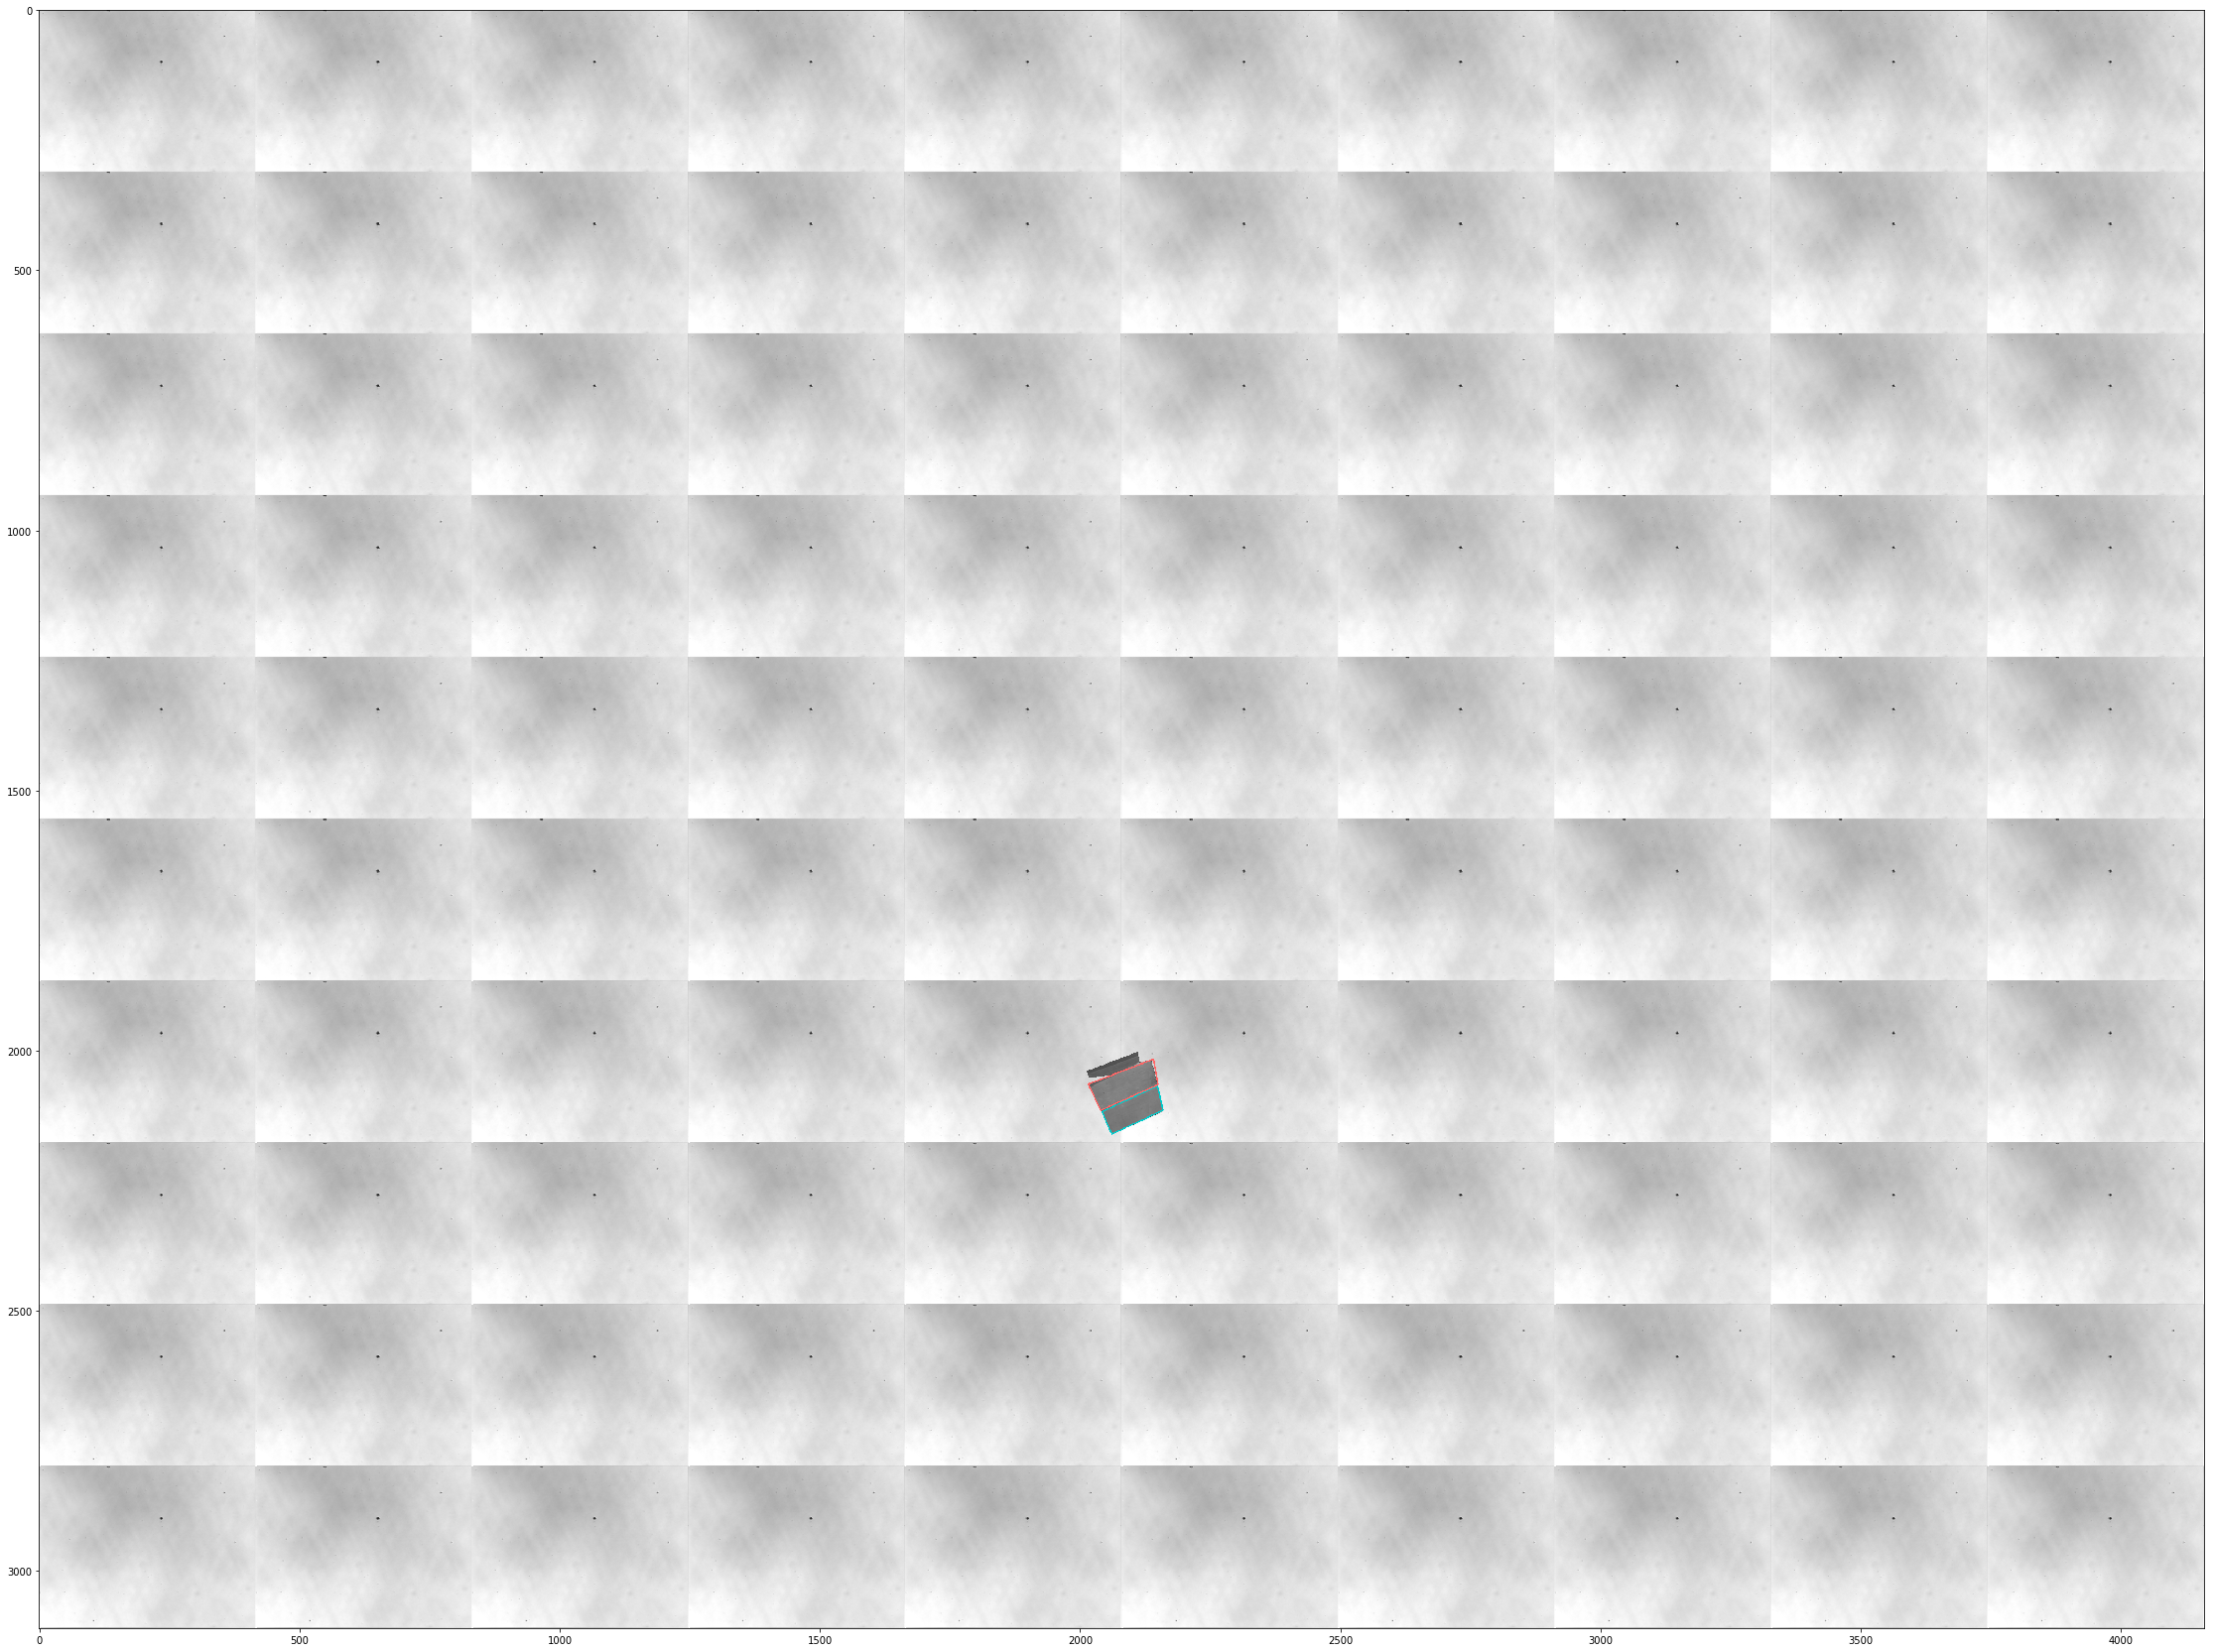

In [401]:
plt.figure(figsize=(40, 30))
plt.imshow(test_artificial)

In [402]:
cv.imwrite("chkerror_wthbackground.tiff", test_artificial)

True